# Assignment 1: Sound Processing Fundamentals

CS-GY 9223: Machine Listening

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

**Read through the text, code, and comments carefully and fill-in the blanks accordingly. Written questions will be denoted with❓, and code questions will be explained in code comments, with "TODO" markers.**

**For all plots, include axis labels with units of measurement when applicable. Lack of this will result in small points deductions.**

The assignment will be 10 points total, with coding and text questions labeled with associated point values.
There is a 0.5 point **extra credit** question at the end of the assignment!


In [2]:
# Start by importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import IPython # useful for playing audio in the notebook
import librosa
from scipy import signal

---

## Part 1: Basics [2 pts]
Let's start by getting familiar with the basics of working with audio signals in Python.

### Working with simple waveforms
First, recall the equation for the simplest periodic wave, a **sinusoid**:

$x(t) = A * sin(2\pi ft + \theta)$

where $A$ is amplitude, $f$ is frequency, $t$ is time, and $\theta$ is phase.

**Before writing any code:**


❓ **1.**  What is the total number of samples for a 4-second sine wave with a sampling rate of 32,000 (i.e. 32kHz)? [0.1 pt]

- **ANSWER**: <br>
Total samples = Time x Sampling rate <br>
Total samples = 4 x 32,000 <br>
Total samples = 128,000 samples


❓ **2.**  I have a sine wave with 32,000 samples and I know it is 2 seconds long. What is the sampling rate? [0.1 pt]

- **ANSWER**: <br>
Sampling rate = Total samples / Time <br>
Sampling rate = 32,000 / 2 <br>
Sampling rate = 16,000 samples/second = 16 kHz

In [1]:
# TODO : Write a function to generate a sine wave. [0.5 pts]

def get_sinusoid(amplitude, frequency, duration, sr, phase=0):
    """
    Generate a sine wave signal.

    Parameters:
    ----------
    amplitude : float
        The peak amplitude of the sine wave.
    frequency : float
        The frequency of the sine wave in Hertz (Hz).
    duration : float
        The duration of the sine wave in seconds.
    sr : int
        The sampling rate, in samples per second (Hz).
    phase : float, optional
        The initial phase of the sine wave in radians. Default is 0.

    Returns:
    -------
    numpy.ndarray
        A 1D array containing the generated sine wave samples.
    """

    t = np.linspace(0, duration, int(sr * duration))
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)

    return signal

In [3]:
# TODO : Use your function to generate two sine waves [0.1 pt]
"""
`wav1`: amp = 1, freq=440, duration=0.5, sr=16000, phase=0
`wav2`: amp = 0.5, freq=1000, duration=0.5, sr=16000, phase=0
"""
wav1 = get_sinusoid(amplitude=1, frequency=440, duration=0.5, sr=16000, phase=0)
wav2 = get_sinusoid(amplitude=0.5, frequency=1000, duration=0.5, sr=16000, phase=0)

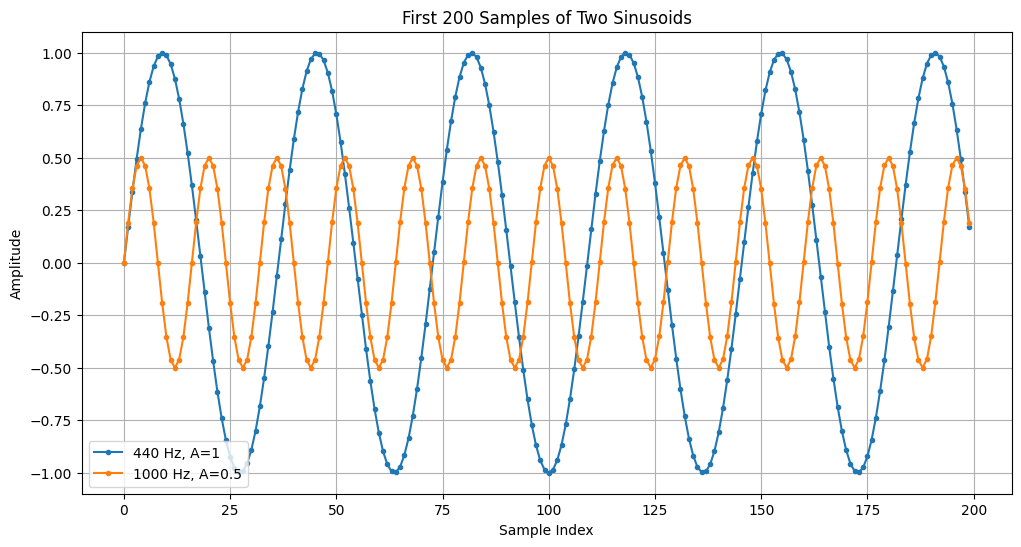

In [7]:
# TODO : Use matplotlib to plot *the first 200 samples* of your two waveforms on the same plot [0.1 pt]
# Hint: plt.plot(wav....)
# Hint 2: Use 'marker = '.' in your plot to show the discretization of your signal.

plt.figure(figsize=(12, 6))

plt.plot(wav1[:200], marker='.', label='440 Hz, A=1')
plt.plot(wav2[:200], marker='.', label='1000 Hz, A=0.5')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 200 Samples of Two Sinusoids')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# TODO : Use IPython to play your audio in the notebook and listen to your audio! [0.1 pt]
# Ref: https://musicinformationretrieval.com/ipython_audio.html#IPython.display.Audio
IPython.display.Audio(wav1, rate=16000)

In [9]:
# TODO : Add wav1 and and wav1 together (or multiply it by 2)
# Examine this result with a plot and listen to the audio [0.05 pts]
wav3 = wav1 + wav1
IPython.display.Audio(wav3, rate=16000)

<ipython-input-15-cba418799e59>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
<ipython-input-15-cba418799e59>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


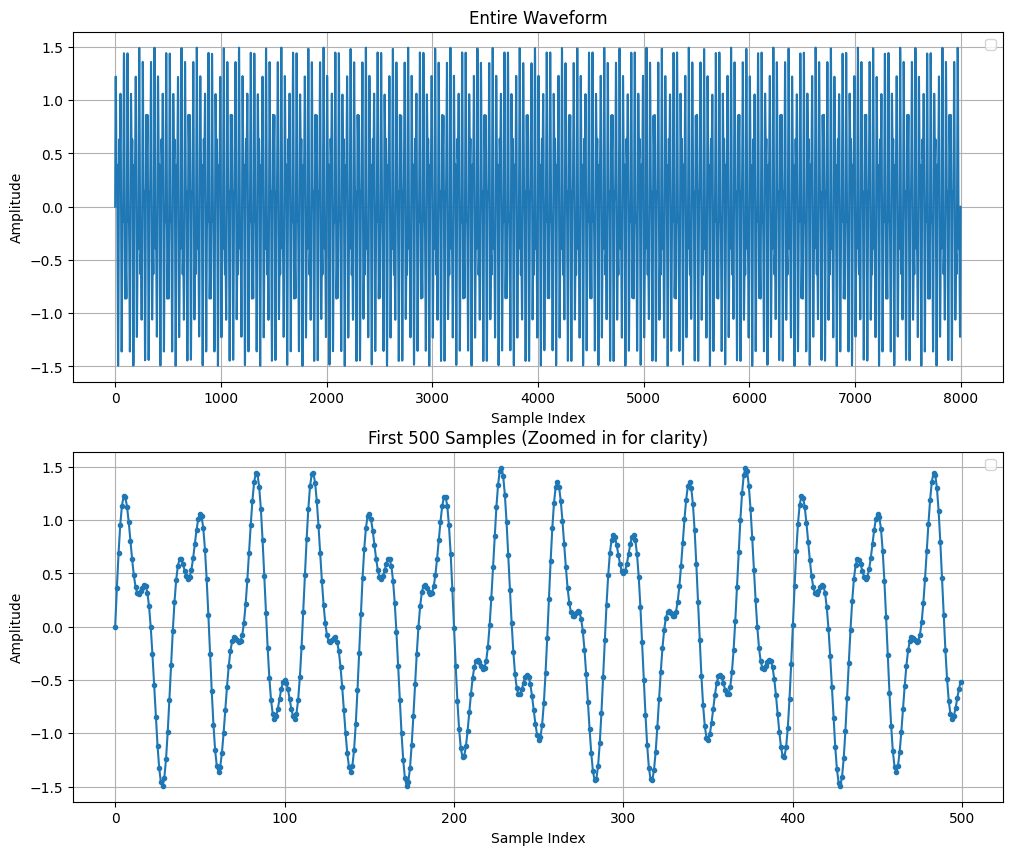

<Figure size 1200x600 with 0 Axes>

In [15]:
# TODO : Plot the sum of wav1 an wav2. [0.05 pts]
# Calculate the sum of the waves
wav4 = wav1 + wav2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plt.figure(figsize=(12, 6))

ax1.plot(wav4)
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.set_title('Entire Waveform')
ax1.grid(True)
ax1.legend()

ax2.plot(wav4[:500], marker='.')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Amplitude')
ax2.set_title('First 500 Samples (Zoomed in for clarity)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

##### Taking a closer look at sample rate...

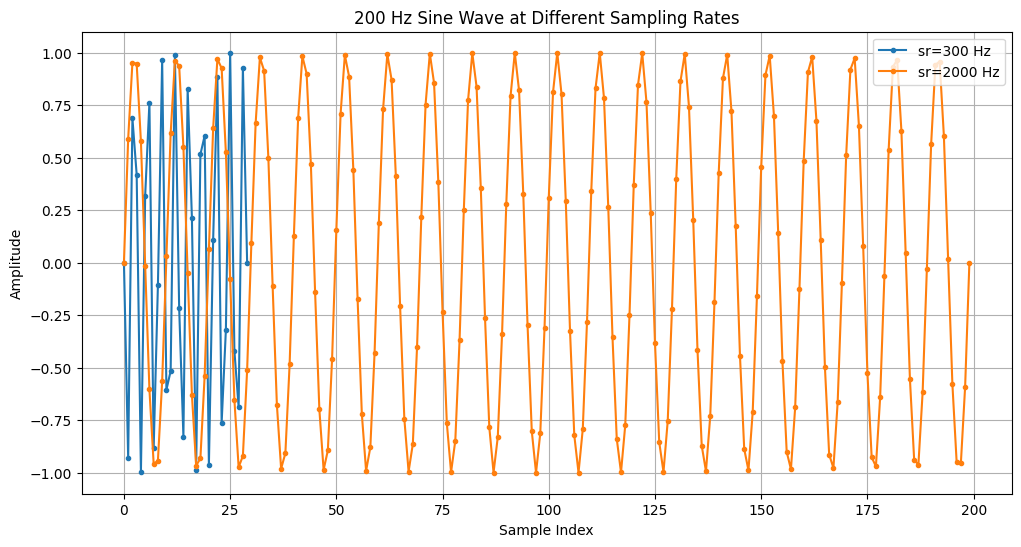

In [18]:
# TODO Generate two sine waves with the following parameters: [0.1 pt]
"""
`sr1`: amp=1, freq=200, duration=0.1, sr=300, phase=0
`sr2`: amp=1, freq=200, duration=0.1, sr=2000, phase=0
"""
sr1 = get_sinusoid(amplitude=1, frequency=200, duration=0.1, sr=300, phase=0)
sr2 = get_sinusoid(amplitude=1, frequency=200, duration=0.1, sr=2000, phase=0)


# TODO Plot the two sine waves on the same plot, with a legend showing their sample rates. [0.1 pt]
plt.figure(figsize=(12, 6))

plt.plot(sr1, marker='.', label='sr=300 Hz')
plt.plot(sr2, marker='.', label='sr=2000 Hz')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('200 Hz Sine Wave at Different Sampling Rates')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

❓ **3.** Above, the waveform with a frequency of 200 and sample rate of 300 illustrates the phenomena of **aliasing**. Explain how this is shown in your  plot. [0.1 pt]

- **ANSWER**: <br>
According to the Nyquist theorem, to accurately sample a signal, we need a sampling rate of at least twice the signal frequency. The waveform with the sampling rate of 300 looks jagged and irregular because the minimum frequency required to sample the 200 Hz signal is 400. In contrast the waveform with sampling rate of 2000 Hz does not show aliasing because it's sampling rate is much higher than the minimum.





---
#### What about other types of waveforms?

Before we move on, let's experiment with one other waveform type: the **sawtooth** wave as seen in class. The closed form equation here is a bit trickier, so we'll use `scipy`'s built in function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html#sawtooth


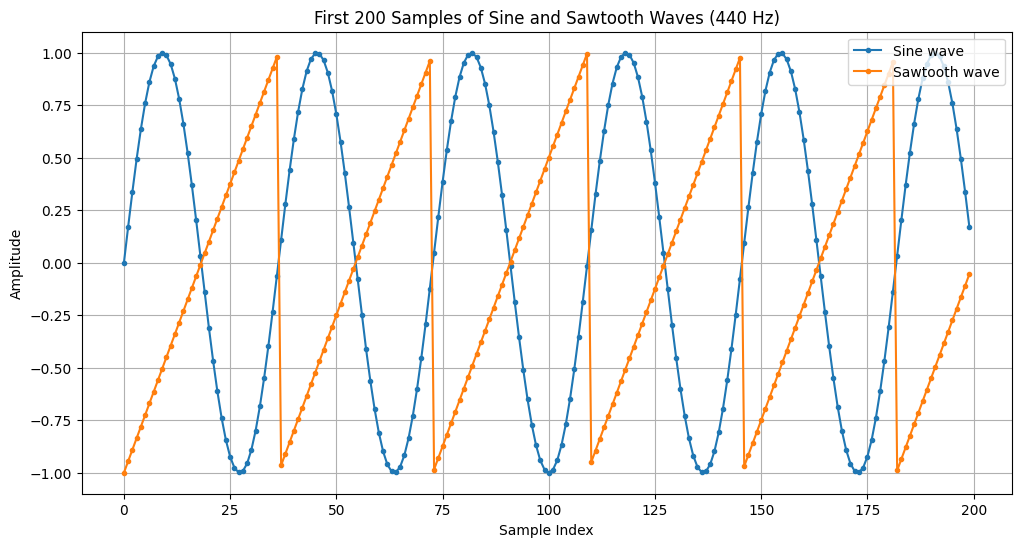

In [21]:
from scipy.signal import sawtooth

# TODO: define a sine wave AND a sawtooth wave (using SciPY) using the following parameters: [0.1 pt]
"""
params: amp = 1, freq=440, duration=1, sr=16000, phase=0
"""

sin = get_sinusoid(amplitude=1, frequency=440, duration=1, sr=16000, phase=0)

t = np.linspace(0, 1, 16000)
saw = sawtooth(2 * np.pi * 440 * t)

# TODO : Plot the sine and sawtooth waves overlayed (plot :200 for clarity) [0.1 pt]
plt.figure(figsize=(12, 6))

plt.plot(sin[:200], marker='.', label='Sine wave')
plt.plot(saw[:200], marker='.', label='Sawtooth wave')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('First 200 Samples of Sine and Sawtooth Waves (440 Hz)')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

❓ **4.** The sawtooth wave is made up of the fundamental frequency and _____(s) , while the sine wave only has its fundamental frequency. [0.1 pt]


- **ANSWER:** The sawtooth wave is made up of the fundamental frequency and **harmonics** , while the sine wave only has its fundamental frequency.





---


### Loading audio clips
Before we get more complicated with simple signals, let's also make sure you know how to load a real-world audio clip in Python.

**[Librosa](https://librosa.org/doc/latest/index.html)** is an awesome library for audio processing in Python, created by Brian McFee (NYU Professor!). We will use Librosa a lot in this class.

For now let's just load files with Librosa: https://librosa.org/doc/0.10.2/generated/librosa.load.html#librosa-load.


Number of samples: 117601
Sampling rate: 22050 Hz
Duration: 5.33 seconds


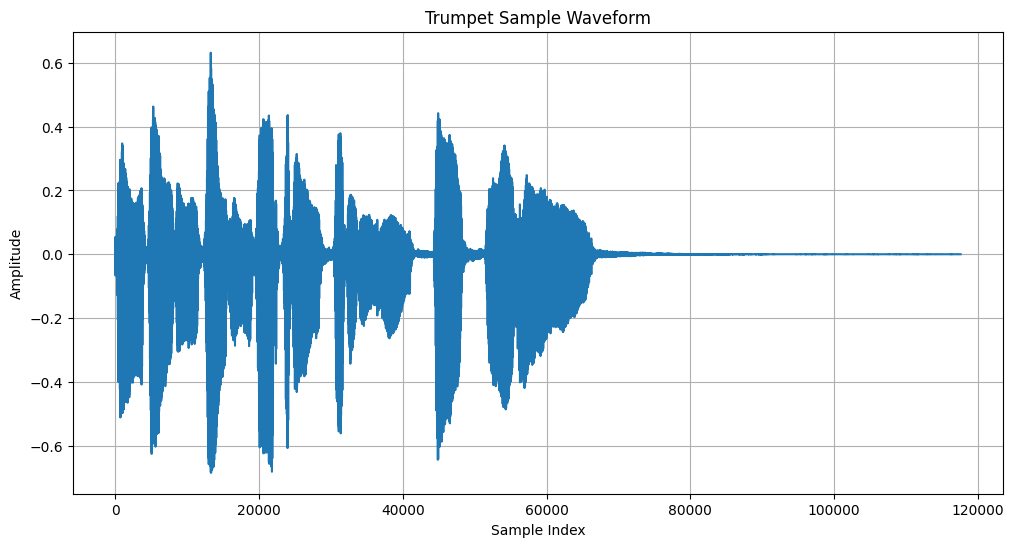

In [25]:
# TODO : Run these first two commands and read the notes [this whole cell: 0.2 pt]
# Librosa has some sample files we can play with:
# If you don't use a sample file, just replace filename with your actual file (i.e. myaudio.wav)
filename = librosa.ex('trumpet')

# There are many parameters to librosa.load (see docs above)
# sr (sample rate) is likely the most important one
# If you pass sr=None, the default sample rate of the file is used.
# If you pass sr=16000, the file will be resampled to that specified sr

# Load our audio file at default sample rate, get our signal and loaded sr
y, sr = librosa.load(filename, sr=None)

# TODO : print the total number of samples, sampling rate, and duration of file (`y`) in seconds [0.05]
num_samples = len(y)
duration = num_samples / sr

print(f"Number of samples: {num_samples}")
print(f"Sampling rate: {sr} Hz")
print(f"Duration: {duration:.2f} seconds")

# TODO: plot the signal
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Trumpet Sample Waveform')
plt.grid(True)
plt.show()

In [30]:
# TODO : Play the signal at the original sample rate [0.05 pt]
# Then load the trumpet file at sr=4000, and play that too. Observe the differences!

IPython.display.Audio(y, rate=sr)

In [31]:
y, sr = librosa.load(filename, sr=4000)
IPython.display.Audio(y, rate=sr)

When using a lower sampling rate the sound quality is muffled/dull as compared to the using the original sampling rate



---


## Part 2: Exploring the Discrete Fourier Transform (DFT) & Fast Fourier Transform (FFT) [4 pts]
In practice we use the **FFT** instead of the raw DFT. The DFT is *very slow* $(O(N^2))$! The FFT is simply an efficient implementation of DFT - it's not really a different algorithm so to speak.

One thing to note is that the DFT and the FFT gives us frequency information on a *global* level, without any temporal information (more to come on that next...)

Let's focus on working with numpy's fft to begin with: https://numpy.org/doc/2.1/reference/generated/numpy.fft.fft.html#numpy.fft.fft.

In [32]:
# TODO: Yay! Write your own function to get the FFT of a signal. [1.5 pts]
# There are a couple nuances here - follow the comments closely to fill-in the blanks here.

def get_fft_spectrum(x, sr):
    """
    Computes the Fast Fourier Transform (FFT) of a 1D signal and
    cleans it up for a spectrum plot.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        sr : int
            Sampling rate of the input signal.
    Returns:
    -------
        trunc_freq_bins : numpy.ndarray
            A 1D array containing the frequency bins.
            Truncated at N/2.
        trunc_fft : numpy.ndarray
            A 1D array containing the FFT values.
            Tuncated at N/2.
    """
    # Fill in each step below:

    # Let N = number of samples
    N = len(x)

    # Define the frequency resolution (from slides)
    # And use this to define the frequency bins
    # Hint: use np.arange for the frequency bins...
    freq_res = sr / N
    freq_bins = np.arange(N) * freq_res

    # Get the FFT of X. Note this will include complex values.
    fft_vals = np.fft.fft(x)

    # Because the FFT is symmetric around N/2:
    # Truncate the frequency bins to only include the first half
    trunc_freq_bins = freq_bins[:N//2]

    # For the FFT itself, get rid of the complex portion
    # and truncate to only include the first half
    trunc_fft = np.abs(fft_vals[:N//2])

    # Finally normalize the magnitude of the FFT by the number of samples it has
    trunc_fft = trunc_fft / N

    # Return your frequency bins and FFT values
    return trunc_freq_bins, trunc_fft


#### Using your FFT function

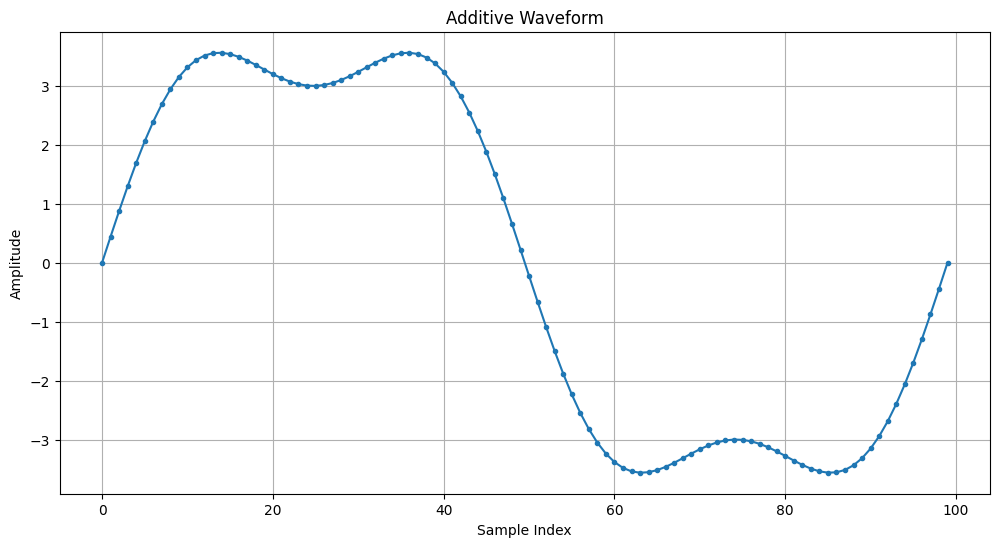

In [38]:
# TODO : Let's try out your function with a simple example [0.1 pt]
"""
`x`: freq=1, amp=4, duration=1, sr=100
"""
x = get_sinusoid(amplitude=4, frequency=1, duration=1, sr=100, phase=0)

# TODO : Now add a second wave to it, with freq=3, amp=1,d duration=1, sr=100
x = x + get_sinusoid(amplitude=1, frequency=3, duration=1, sr=100, phase=0)

# TODO : Plot the additive waveform
plt.figure(figsize=(12, 6))
plt.plot(x, marker=".")
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Additive Waveform')
plt.grid(True)
plt.show()

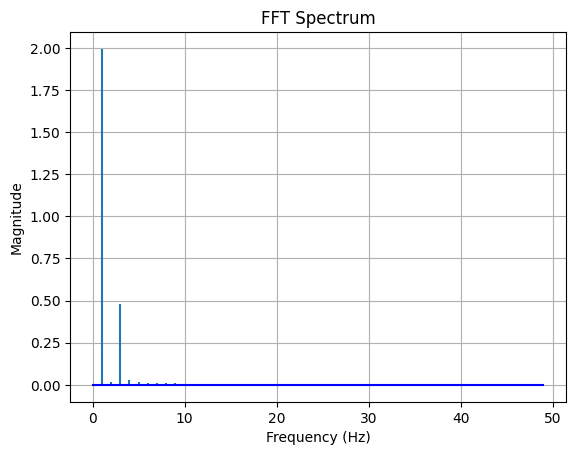

In [36]:
# TODO : Use your FFT function to get the freqs and FFT bins for x. [0.1 pt]
freqs, fft_vals = get_fft_spectrum(x, 100)

# TODO : Plot the spectrum [0.1 pt]
# Hint: use plt.stem()
plt.stem(freqs, fft_vals, markerfmt=' ', basefmt='-b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Spectrum')
plt.grid(True)
plt.show()


**TODO**: Create a sine wave with `amp=1`, `freq=5.5`, `duration=1`, `sr=100`.  

**For each scenario below**, create a plot containing two subplots: the top row should show the time domain signal, and the bottom row plot should show the magnitude spectrum, from your FFT function.

Do this three times, with the three variations shown below:


#### FFT Part 1: Original Signal

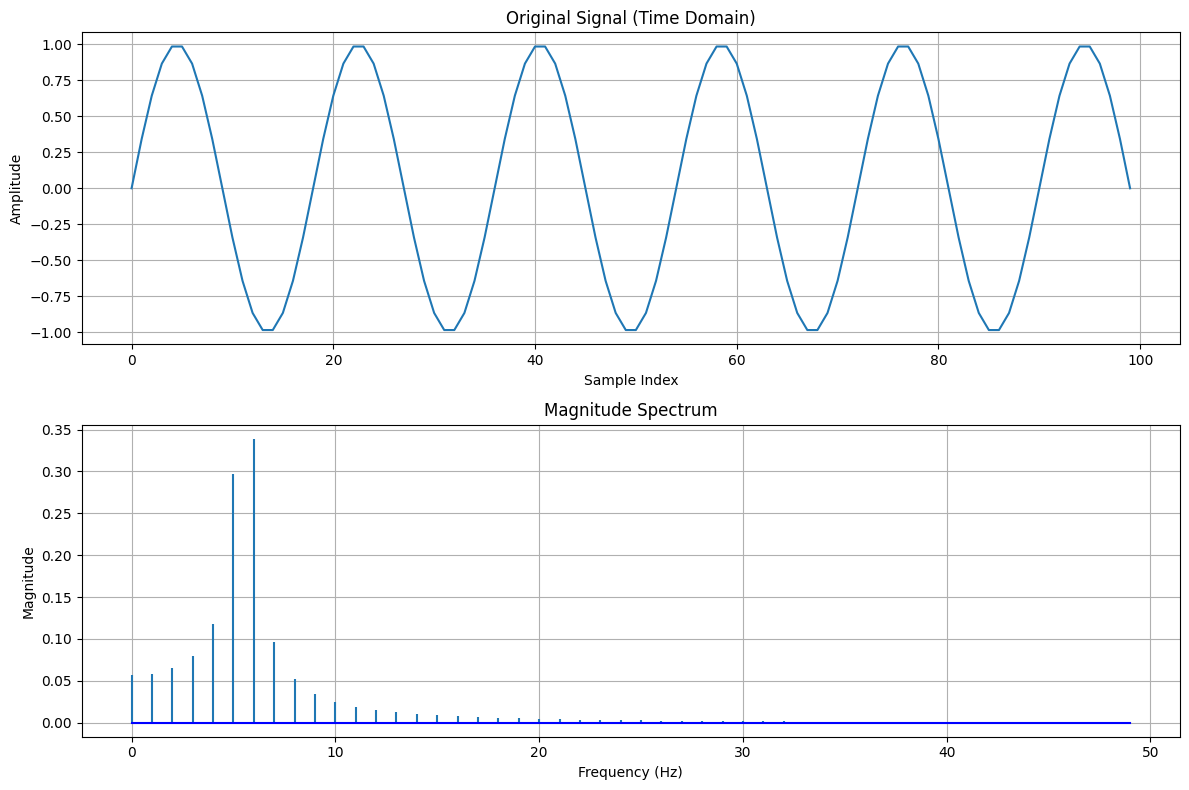

In [39]:
# TODO : Part 1 [0.5 pt]
# Plot the original time domain signal and magnitude spectrum of the signal described above.
"""
`y`: amp = 1, freq=5.5, duration=1, phase = 0, sr=100
"""
y = get_sinusoid(amplitude=1, frequency=5.5, duration=1, sr=100, phase=0)
freqs, fft_vals = get_fft_spectrum(y, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(y)
ax1.set_title('Original Signal (Time Domain)')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

ax2.stem(freqs, fft_vals, markerfmt=' ', basefmt='-b')
ax2.set_title('Magnitude Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

plt.tight_layout()
plt.show()

❓ **TODO: 5.** Why are there peaks in the spectrum at frequencies besides 5.5hz, if this is a pure sine wave? What is this phenomena called? [0.1 pt]

- **ANSWER:** The additional peaks in the spectrum besides 5.5Hz are due to **spectral leakage**. This occurs because our signal is not perfectly periodic within the sampling window (i.e., 5.5 Hz doesn't divide evenly into our 1-second window). When we take the FFT, the signal gets treated as if it repeats infinitely, creating discontinuities at the boundaries, which leads to energy "leaking" into adjacent frequency bins.

#### FFT Part 2: Padding

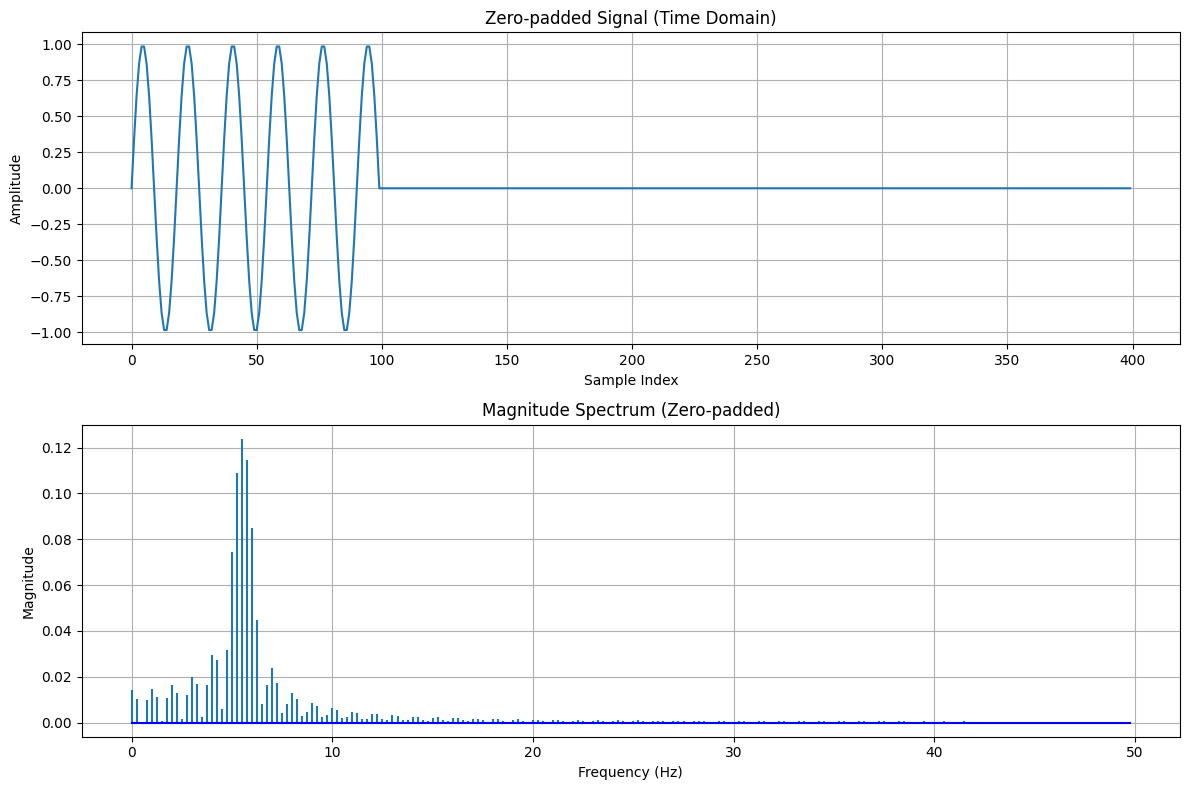

In [41]:
# TODO : Part 2 [0.5 pt]
# Zero-pad the end of the [same] signal to make it 4x the length of the original signal.
# Plot this new signal and the spectrum.

zero_padded = np.pad(y, (0, len(y)*3))
freqs_zp, fft_vals_zp = get_fft_spectrum(zero_padded, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(zero_padded)
ax1.set_title('Zero-padded Signal (Time Domain)')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

ax2.stem(freqs_zp, fft_vals_zp, markerfmt=' ', basefmt='-b')
ax2.set_title('Magnitude Spectrum (Zero-padded)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

plt.tight_layout()
plt.show()

❓ **TODO: 6.** How does this change the spectrum vs. the original one without zero-padding? [0.1 pt]

- **ANSWER**: Zero-padding increases the frequency resolution by adding more points in the frequency domain, resulting in a smoother spectrum appearance through interpolation between frequency points. While it doesn't alter peak magnitudes or add new information, it provides a clearer visualization of the existing frequency content's shape and detail.


#### FFT Part 3: Windowing


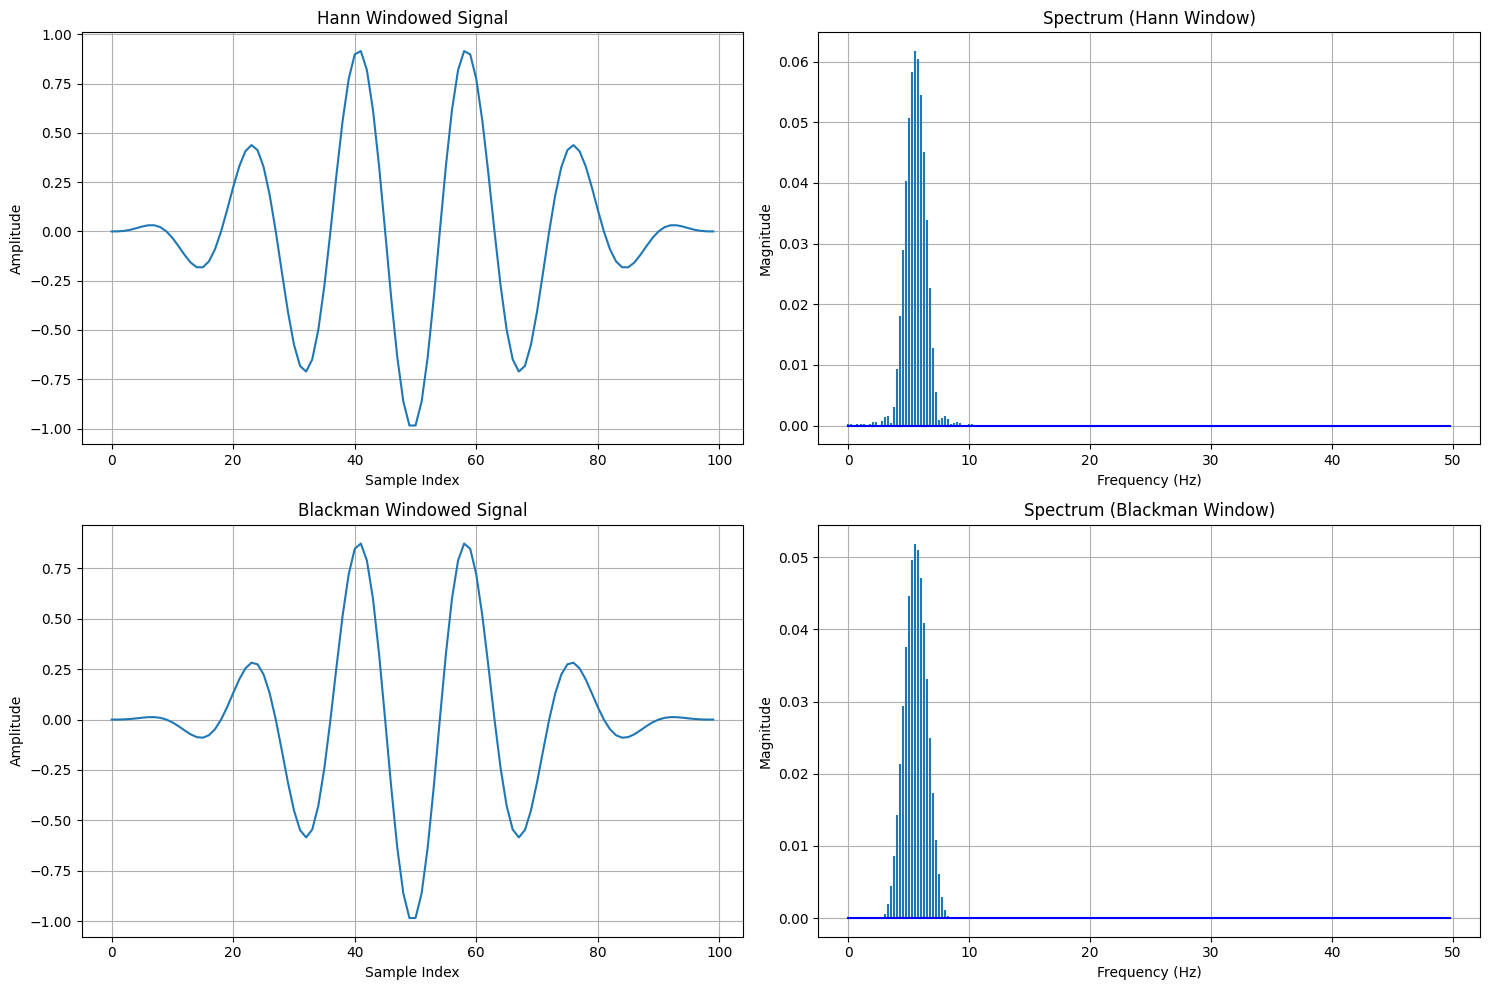

In [42]:
from scipy.signal.windows import hann, blackman
# TODO : Part 3 [0.5 pt]
# Apply a window to the [same] signal. Experiment with at least two window types.
# Hint: zero-pad the windowed signal to 4x the original length, as we did in part 2.

hann_window = hann(len(y))
blackman_window = blackman(len(y))

y_hann = np.pad(y * hann_window, (0, len(y)*3))
freqs_hann, fft_vals_hann = get_fft_spectrum(y_hann, 100)

y_blackman = np.pad(y * blackman_window, (0, len(y)*3))
freqs_blackman, fft_vals_blackman = get_fft_spectrum(y_blackman, 100)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(y * hann_window)
ax1.set_title('Hann Windowed Signal')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Amplitude')
ax1.grid(True)


ax2.stem(freqs_hann, fft_vals_hann, markerfmt=' ', basefmt='-b')
ax2.set_title('Spectrum (Hann Window)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.grid(True)

ax3.plot(y * blackman_window)
ax3.set_title('Blackman Windowed Signal')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Amplitude')
ax3.grid(True)

ax4.stem(freqs_blackman, fft_vals_blackman, markerfmt=' ', basefmt='-b')
ax4.set_title('Spectrum (Blackman Window)')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Magnitude')
ax4.grid(True)

plt.tight_layout()
plt.show()

🥳🥳🥳 **Nice!**

From here on out, **zero-padding** and **windowing** will be used almost always, because of the effects we showed above.

---
### Applying the FFT to real audio [0.5 pt]

**TODO:** Use your function to get the frequency bins and FFT of the **FIRST 4000** samples of the trumpet sample from Librosa above.

We want to isolate this to just a single note for the purpose of this exercise, which is why we're truncating here.

In [43]:
# TODO: Load the trumpet sample and truncate to 4k samples
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=None)
y_trunc = y[:4000]

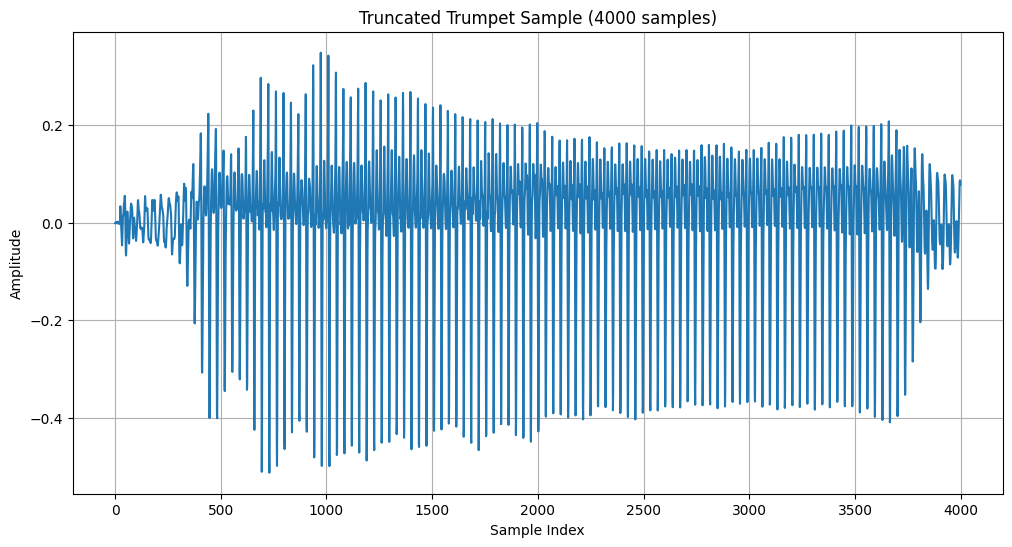

In [44]:
# TODO: Play the audio and plot it
plt.figure(figsize=(12, 6))
plt.plot(y_trunc)
plt.title('Truncated Trumpet Sample (4000 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

IPython.display.Audio(y_trunc, rate=sr)

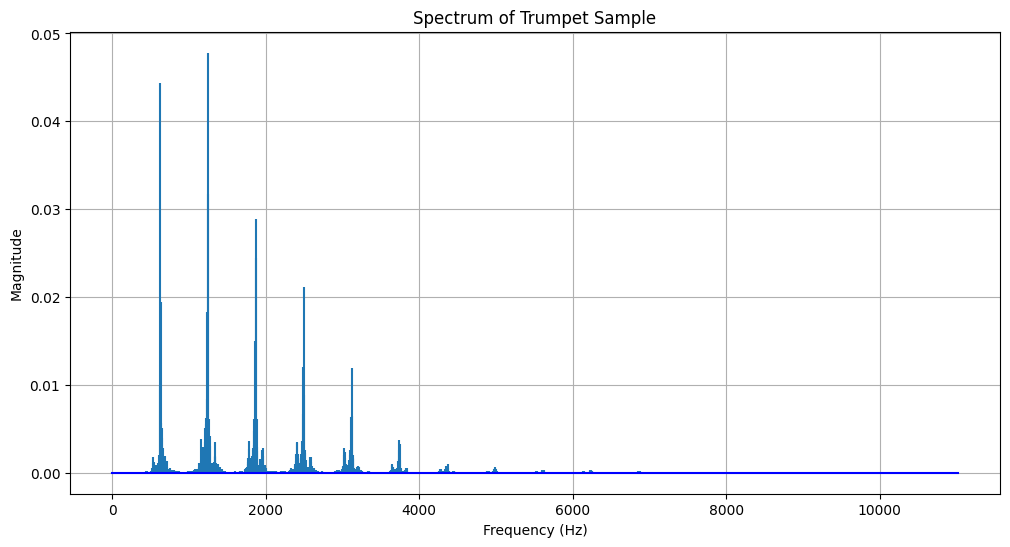

In [45]:
# TODO: Use your FFT function on the trumpet sample above.
# Plot the spectrum. Do the peaks correspond with the pitch of this note as expected? Yes
freqs, fft_vals = get_fft_spectrum(y_trunc, sr)

plt.figure(figsize=(12, 6))
plt.stem(freqs, fft_vals, markerfmt=' ', basefmt='-b')
plt.title('Spectrum of Trumpet Sample')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()



---

## Part 3: FFT -> Short Time Fourier Transform (STFT) & Spectrograms [4 pts]
The STFT applies the FFT to short frames of time, i.e. **"frames"**, yielding a time-frequency representation of a signal instead of a simple spectrum. Because we are applying this at a "frame" level, there are a number of parameters to play with that provide different tradeoffs in terms of temporal and frequency resolution.

❓ 7. What do you gain from using the STFT vs the DFT/FFT? [0.1 pt]

- **ANSWER**: With STFT, you gain the ability to analyze how frequencies change over time, unlike DFT/FFT which only shows the frequency content of the entire signal. This is particularly useful for analyzing real-world signals like speech or music where frequency content evolves over time. STFT effectively gives you a "time-frequency" representation of the signal rather than just the frequency components.

❓ 8. How many STFT output frames would there be given a 2-sec signal with sample rate 16,000, with a frame size of 1024 and hop size of 512? Show your calculations. [0.1 pt]

- **ANSWER**: <br>
Total Samples = Duration x Sample Rate <br>
Total Samples = 2 x 16000 = 32000 samples <br>
Number of frames = 1 + ⌊(Total Samples - Frame Size)/Hop Size⌋ <br>
Number of frames = 1 + ⌊(32000 - 1024)/512⌋ <br>
Number of frames = 1 + 60 = 61 frames

#### Next you'll be designing your own STFT function!

In [46]:
# TODO : Write a function for a basic STFT, following the function def below. [2 pt]
# DO NOT USE LIBROSA, but you can use numpy :)
# Hint: use "np.fft.rfft" to only get the real, non-negative frequencies here
# Hint: use zero-padding to add a half frame of padding to the start and end of the signal to make sure no info is lost.

def simple_stft(x, frame_len, hop_len, window_type='boxcar'):
    """
    Computes the Short-Time Fourier Transform (STFT) of a 1D signal.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        frame_len :  int
            Length of each frame (window size).
        hop_len : int
            Hop length between consecutive frames.
        window_type : str
            Type of window e.g. "hann", "boxcar".

    Returns:
    --------
    stft_result : numpy.ndarray
        A 2D array (n_freqs, n_frames) where each row corresponds to the real,
        non-negative frequency components of a frame.

    """
    window = np.ones(frame_len) if window_type == 'boxcar' else signal.windows.get_window(window_type, frame_len)
    pad_len = frame_len // 2
    x_padded = np.pad(x, (pad_len, pad_len))
    n_frames = 1 + (len(x_padded) - frame_len) // hop_len
    n_freqs = frame_len // 2 + 1
    stft_result = np.zeros((n_freqs, n_frames), dtype=complex)

    for i in range(n_frames):
      start = i * hop_len
      frame = x_padded[start:start + frame_len]
      windowed_frame = frame * window
      frame_fft = np.fft.rfft(windowed_frame)
      stft_result[:, i] = frame_fft

    return stft_result

In [47]:
# TODO : sanity check 1 [0.1]
# Run these checks on dummy signals to make sure your STFT has the right number of frames.
sig = np.random.rand((200))
test1 = simple_stft(sig, frame_len=80, hop_len=30, window_type='boxcar')
print(test1.shape)
assert test1.shape == (41,7)

(41, 7)


In [48]:
# TODO : sanity check 2 [0.1]
sig2 = np.random.rand((200))
test2 = simple_stft(sig2, frame_len=80, hop_len=80, window_type='boxcar')
print(test2.shape)
assert test2.shape == (41,3)

(41, 3)


In [49]:
# TODO : sanity check 3 [0.1]
sig3 = np.random.rand((200))
test3 = simple_stft(sig3, frame_len=80, hop_len=100, window_type='boxcar')
print(test3.shape)
assert test3.shape == (41,3)

(41, 3)


In [51]:
# TODO : Confirm your answer to question #8 using your function and a dummy signal [0.1]
dummy_signal = get_sinusoid(amplitude=1, frequency=440, duration=2, sr=16000, phase=0)
frame_len = 1024
hop_len = 512
stft_result = simple_stft(dummy_signal, frame_len, hop_len)

n_freqs, n_frames = stft_result.shape

print(f"Signal length: {len(dummy_signal)} samples")
print(f"Number of STFT frames: {n_frames}")
print(f"Number of frequency bins: {n_freqs}")

Signal length: 32000 samples
Number of STFT frames: 63
Number of frequency bins: 513


There is a discrepancy in the answer of question 8 and the output we get here, this is because in question 8 we didn't include the zero padding, on including that we change the number of samples from 32000 to 33024, on using this updated number of samples we get 63 frames in output.

### STFT -> Spectrograms
Now let's apply your STFT function to real audio.

In [52]:
# Let's use the Librosa trumpet example file from above to work with our STFT [0.1]
# TODO : load the trumpet audio, and truncate it to be only 3 seconds long.
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=None)
samples_3sec = 3 * sr
y_trunc = y[:samples_3sec]

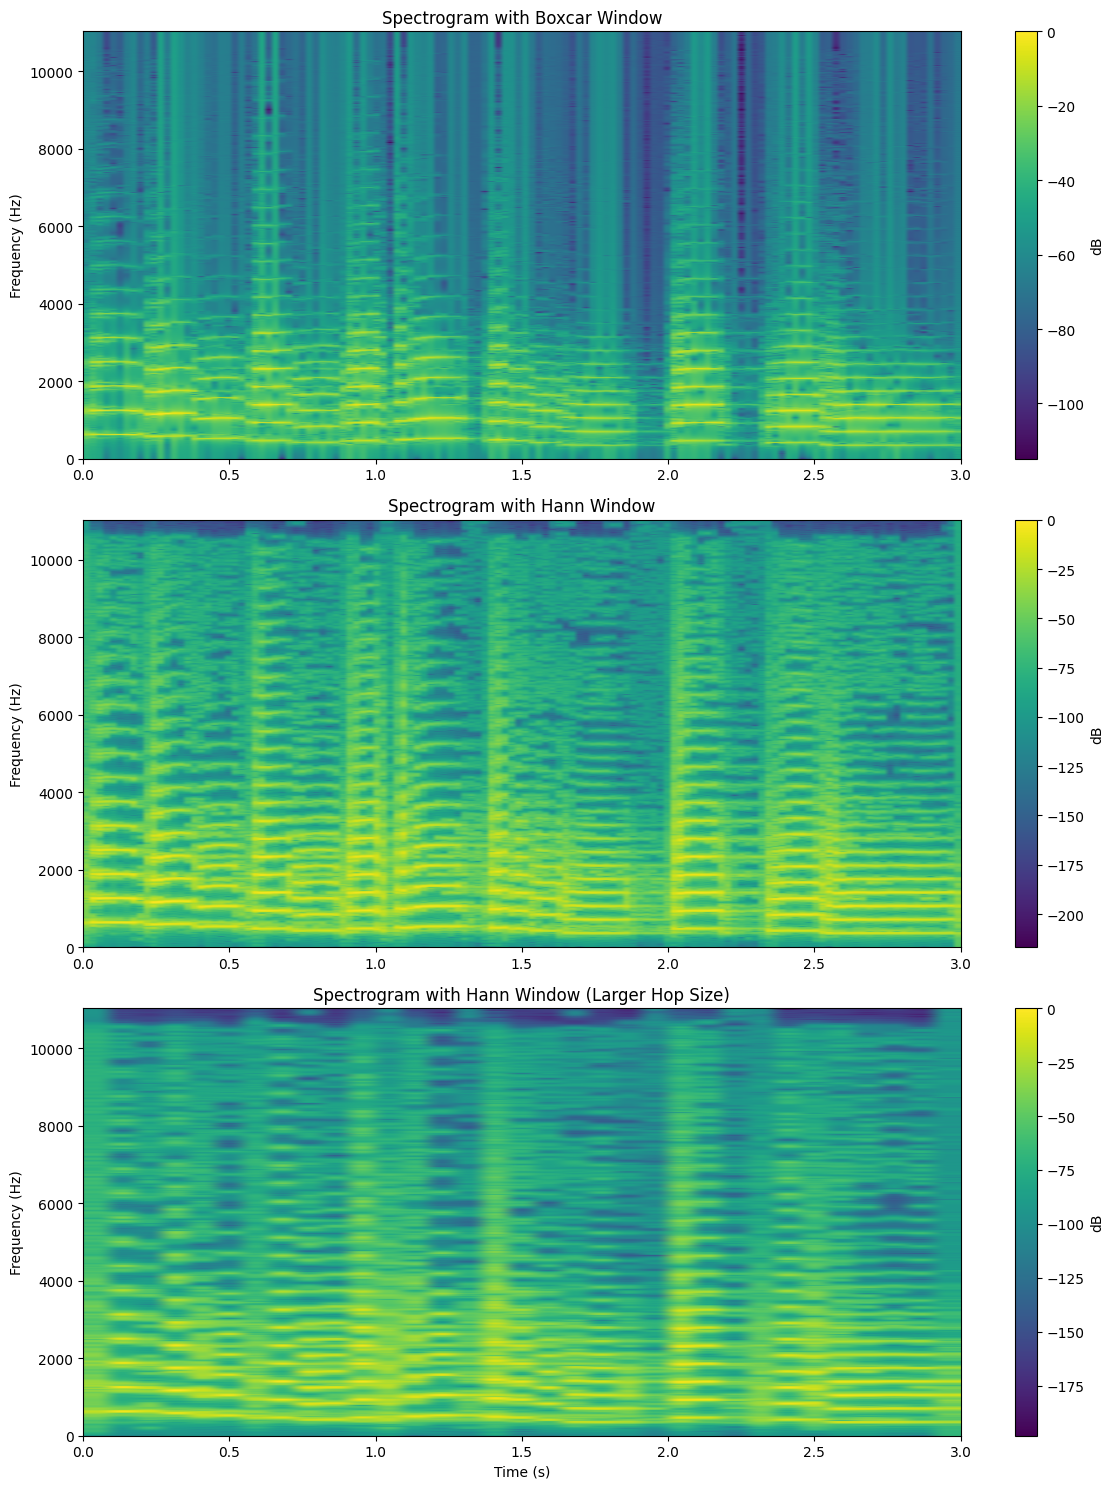

In [53]:
# TODO : Run `simple_stft` with three different sets of parameters:  [0.2 pt]
"""
`stft1`:  frame_len=1024, hop_len=512, window='boxcar'
`stft2`:  frame_len=1024, hop_len=512, window='hann'
`stft3`:  frame_len=1024, hop_len=2056, window='hann'
"""
stft1 = simple_stft(y_trunc, frame_len=1024, hop_len=512, window_type='boxcar')
stft2 = simple_stft(y_trunc, frame_len=1024, hop_len=512, window_type='hann')
stft3 = simple_stft(y_trunc, frame_len=1024, hop_len=2056, window_type='hann')

# TODO : Plot a spectrogram from each of these STFTs (THREE PLOTS TOTAL) [1 pt]
# Hint: You can use plt.imshow (with some finagling), or check out librosa.display.specshow
# Hint: You will need to take the absolute value of the STFT and also convert it from amplitude to DB.

def to_db(X, ref=np.max):
    ref_value = ref(abs(X))
    return 20 * np.log10(abs(X) / ref_value)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

im1 = ax1.imshow(to_db(stft1),
                 aspect='auto',
                 origin='lower',
                 extent=[0, len(y_trunc)/sr, 0, sr/2])
ax1.set_title('Spectrogram with Boxcar Window')
ax1.set_ylabel('Frequency (Hz)')
plt.colorbar(im1, ax=ax1, label='dB')

im2 = ax2.imshow(to_db(stft2),
                 aspect='auto',
                 origin='lower',
                 extent=[0, len(y_trunc)/sr, 0, sr/2])
ax2.set_title('Spectrogram with Hann Window')
ax2.set_ylabel('Frequency (Hz)')
plt.colorbar(im2, ax=ax2, label='dB')

im3 = ax3.imshow(to_db(stft3),
                 aspect='auto',
                 origin='lower',
                 extent=[0, len(y_trunc)/sr, 0, sr/2])
ax3.set_title('Spectrogram with Hann Window (Larger Hop Size)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')
plt.colorbar(im3, ax=ax3, label='dB')

plt.tight_layout()
plt.show()

❓ **9.** What do you notice about the differences between each of these spectrograms? Explain the trade-offs between frame and hop lengths and the relationship between the two. [0.1 pt]

- **ANSWER**: Looking at these spectrograms, we can observe clear differences between the window types. The boxcar window in the top spectrogram shows significant vertical smearing in the frequency domain, while the Hann window in the middle spectrogram provides cleaner frequency separation with reduced spectral leakage. <br>
The difference between hop lengths is evident when comparing the middle and bottom spectrograms. The larger hop size in the bottom spectrogram results in a more sparse time representation, showing fewer vertical slices and some loss of temporal detail. This demonstrates the fundamental trade-off in STFT analysis: smaller hop sizes provide better temporal resolution but increase computational cost, while larger hop sizes are more computationally efficient but may miss rapid changes in the signal. Since all three spectrograms use the same frame length of 1024 samples, we cannot observe or comment on the effects of different frame lengths on the frequency resolution.

---

## Extra Credit [0.5 pts, partial possible]
Taking what you've learned above one step further:
- Plot the STFT of the truncated trumpet sample from the previous exercise in both *linear* and *log* spectrogram scaling.
- Use a function from `librosa` to pitch shift the sample up or down a significant amount (e.g. 10+ steps).
- Plot this pitch-shifted signal in both linear and log spectrograms.

❓ **EC** What do you notice about how the spacing of the harmonics in linear vs. log-scaled spectrograms? Write down some observations of the original and pitch shifted signals in these two settings.

- **ANSWER**: The linear spectrograms show the fundamental frequencies as bright lines against a dark background, but make it difficult to observe the finer details of the trumpet's sound. In contrast, the logarithmic scale reveals a richer representation of both loud and subtle components in the signal. The pitch-shifted versions clearly demonstrate the upward frequency shift - in the linear view through higher positioned lines, and in the logarithmic view through an upward shift of the entire spectral pattern while preserving the instrument's characteristic tonal structure.

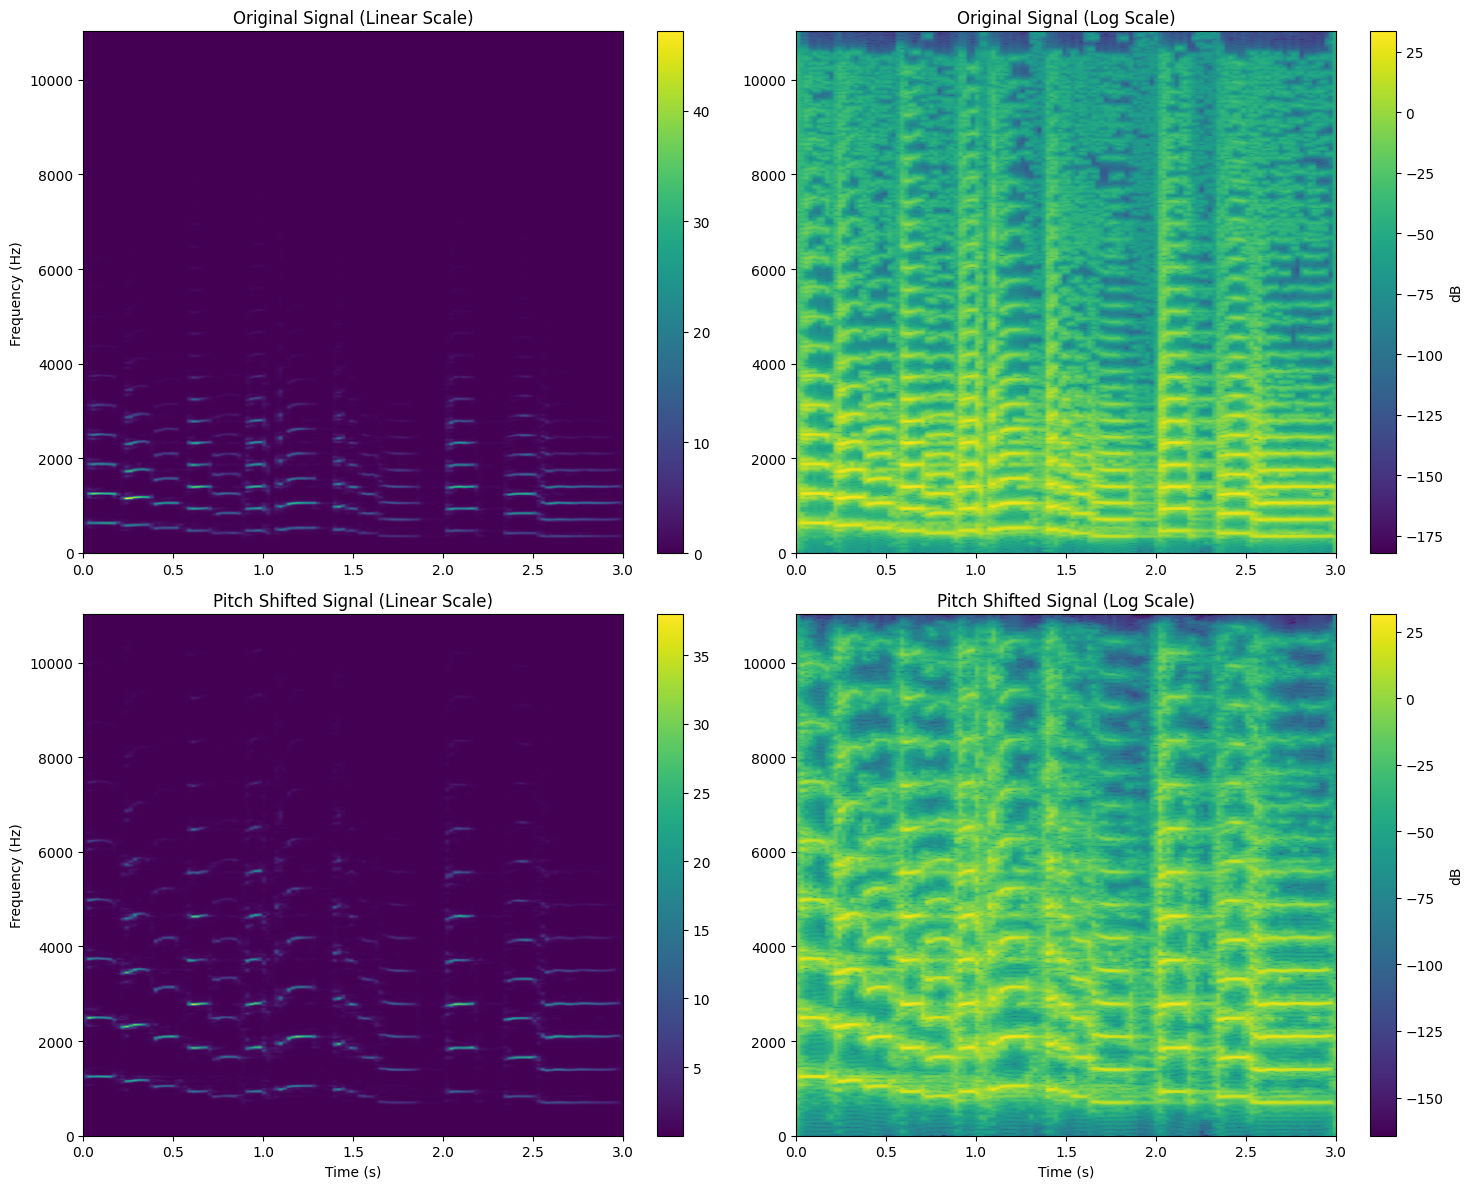

In [56]:
stft_orig = simple_stft(y_trunc, frame_len=1024, hop_len=512, window_type='hann')

y_shifted = librosa.effects.pitch_shift(y_trunc, sr=sr, n_steps=12)
stft_shifted = simple_stft(y_shifted, frame_len=1024, hop_len=512, window_type='hann')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

im1 = ax1.imshow(np.abs(stft_orig),
                aspect='auto',
                origin='lower',
                extent=[0, len(y_trunc)/sr, 0, sr/2])
ax1.set_title('Original Signal (Linear Scale)')
ax1.set_ylabel('Frequency (Hz)')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(20 * np.log10(np.abs(stft_orig) + 1e-10),
                aspect='auto',
                origin='lower',
                extent=[0, len(y_trunc)/sr, 0, sr/2])
ax2.set_title('Original Signal (Log Scale)')
plt.colorbar(im2, ax=ax2, label='dB')

im3 = ax3.imshow(np.abs(stft_shifted),
                aspect='auto',
                origin='lower',
                extent=[0, len(y_shifted)/sr, 0, sr/2])
ax3.set_title('Pitch Shifted Signal (Linear Scale)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')
plt.colorbar(im3, ax=ax3)

im4 = ax4.imshow(20 * np.log10(np.abs(stft_shifted) + 1e-10),
                aspect='auto',
                origin='lower',
                extent=[0, len(y_shifted)/sr, 0, sr/2])
ax4.set_title('Pitch Shifted Signal (Log Scale)')
ax4.set_xlabel('Time (s)')
plt.colorbar(im4, ax=ax4, label='dB')

plt.tight_layout()
plt.show()